This notebook compares the stratified cylinder cases. 

All cases are linearly stratified with Brunt-Vaisala frequency: $N=0.01$

In [7]:
from __future__ import division
import sys
from IPython.display import HTML
sys.path.insert(0, '/ocean/rirwin/Half_Cylinder_MITgcm/Unstratified_Cylinder/Resolution_Dependence/analysis/')

import cylanalysis as cyl
import numpy as np
from MITgcmutils import rdmds
import matplotlib as mpl
from matplotlib import animation
import matplotlib.pyplot as plt
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')

import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (10.0, 8.0)

%matplotlib inline

In [8]:
%%capture --no-stdout
cyl_case = []

cyl_case.append(cyl.CylCase('/ocean/rirwin/Half_Cylinder_MITgcm/Stratified_Cylinder/STR01280128/'))
cyl_case.append(cyl.CylCase('/ocean/rirwin/Half_Cylinder_MITgcm/Stratified_Cylinder/STR02560128/'))
cyl_case.append(cyl.CylCase('/ocean/rirwin/Half_Cylinder_MITgcm/Stratified_Cylinder/STR02560256/'))
cyl_case.append(cyl.CylCase('/ocean/rirwin/Half_Cylinder_MITgcm/Stratified_Cylinder/STR05120256/'))
cyl_case.append(cyl.CylCase('/ocean/rirwin/Half_Cylinder_MITgcm/Stratified_Cylinder/STR05120512/'))

In [14]:
NCASES=len(cyl_case)

dout = []
max_out = []

id_str = []

#Re = 25
dout.append(1000)
dout.append(1000)
dout.append(1000)
dout.append(1000)
dout.append(1000)

max_out.append(600000)
max_out.append(409000)
max_out.append(192000)
max_out.append(93000)
max_out.append(109000)

delta = np.sqrt(2e-5/0.01)

dx = []
dx.append(0.4/128)
dx.append(0.4/256)
dx.append(0.4/256)
dx.append(0.4/512)
dx.append(0.4/512)

dz = []
dz.append(0.4/128)
dz.append(0.4/128)
dz.append(0.4/256)
dz.append(0.4/256)
dz.append(0.4/512)

for ii in range(0,NCASES):
    id_str.append('$N=0.01$, $\delta/dr=$'+str(delta/np.sqrt(dz[ii]**2+dx[ii]**2)))

/ocean/rirwin/Half_Cylinder_MITgcm/Stratified_Cylinder/STR01280128/U.0000090000.001.001.meta
/ocean/rirwin/Half_Cylinder_MITgcm/Stratified_Cylinder/STR01280128/W.0000090000.001.001.meta
/ocean/rirwin/Half_Cylinder_MITgcm/Stratified_Cylinder/STR01280128/U.0000090000.001.001.meta
/ocean/rirwin/Half_Cylinder_MITgcm/Stratified_Cylinder/STR01280128/W.0000090000.001.001.meta
/ocean/rirwin/Half_Cylinder_MITgcm/Stratified_Cylinder/STR02560128/U.0000090000.001.001.meta
/ocean/rirwin/Half_Cylinder_MITgcm/Stratified_Cylinder/STR02560128/W.0000090000.001.001.meta
/ocean/rirwin/Half_Cylinder_MITgcm/Stratified_Cylinder/STR02560128/U.0000090000.001.001.meta
/ocean/rirwin/Half_Cylinder_MITgcm/Stratified_Cylinder/STR02560128/W.0000090000.001.001.meta
/ocean/rirwin/Half_Cylinder_MITgcm/Stratified_Cylinder/STR02560256/U.0000090000.001.001.meta
/ocean/rirwin/Half_Cylinder_MITgcm/Stratified_Cylinder/STR02560256/W.0000090000.001.001.meta
/ocean/rirwin/Half_Cylinder_MITgcm/Stratified_Cylinder/STR02560256/U.0

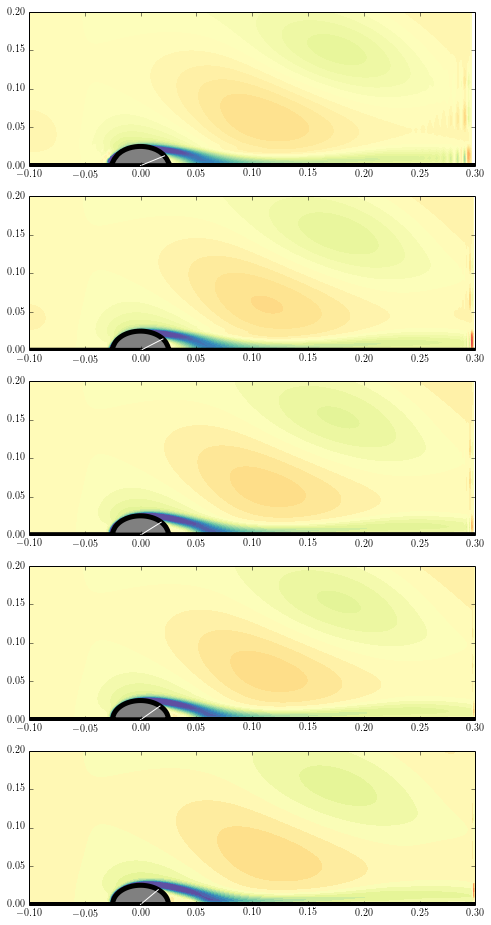

In [16]:
n=90
fig = plt.figure(figsize=(8,16))

for CASE in range(0,NCASES):
    U,W,vort=cyl_case[CASE].get_fields_at_output(n*dout[CASE])
    thet,dudz = cyl_case[CASE].get_dudz(n*dout[CASE]); 
    sep_pt = cyl_case[CASE].find_zero(thet,dudz)

    thet_0 = (180-sep_pt)*np.pi/180

    plt.subplot(NCASES,1,CASE+1)
    plt.contourf(cyl_case[CASE].XG,cyl_case[CASE].ZG,vort,100,cmap='Spectral_r')
    plt.fill(cyl_case[CASE].XC,0.4-cyl_case[CASE].Depth,facecolor='gray',lw=5)
    plt.plot([0, np.cos(thet_0)*0.025],[0,np.sin(thet_0)*0.025],'-w')
    plt.clim((-1,1))
    plt.xlim((-0.1,0.3))
    plt.ylim((0.0,0.2))
plt.show()

In [17]:
%%capture --no-stdout
all_sep_pts = []
fin_sep = []
for jj in range(0,NCASES):
    sep_pts = []
    for ii in range(0,int(max_out[jj]/dout[jj])+1):
        if ii*dout[jj] <= max_out[jj]:
            thet_tmp,dudz_tmp = cyl_case[jj].get_dudz(dout[jj]*ii)
            sep_pts.append([ii*dout[jj],cyl_case[jj].find_zero(thet_tmp,dudz_tmp)])
    all_sep_pts.append(sep_pts)
    fin_sep.append(sep_pts[-1][1])
    print "Done case " + str(jj) + "."

Done case 0.
Done case 1.
Done case 2.
Done case 3.
Done case 4.


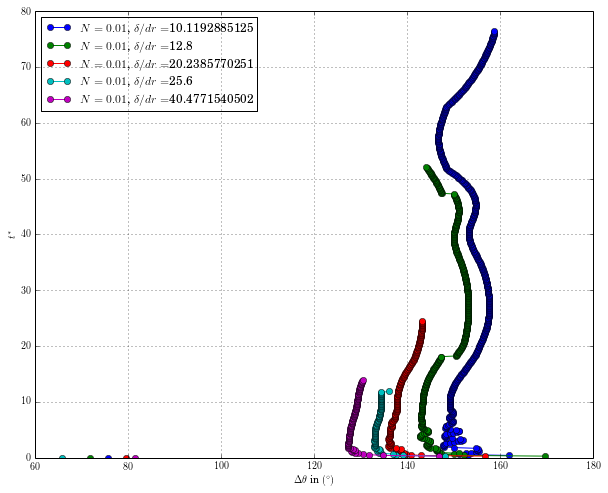

In [18]:
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

plt.figure()

for ii in range(0,NCASES):
    sep_pts = all_sep_pts[ii]
    tt = []
    sep = []
    for jj in sep_pts:
        tt.append((jj[0]/dout[ii])/(np.pi*0.025/0.01))
        sep.append(jj[1])
    if ii<=5:
        plt.plot(np.array(sep),tt,'-o',label=id_str[ii])
    else:
        plt.plot(np.array(sep),tt,'-s',label=id_str[ii])
    
plt.legend(loc=2)
plt.grid()
plt.ylabel(r'$t^*$')
plt.xlabel(r'$\Delta \theta$ in $(^\circ)$')
plt.show()